# Worksheet 12

Contour Detection Pipeline Example:

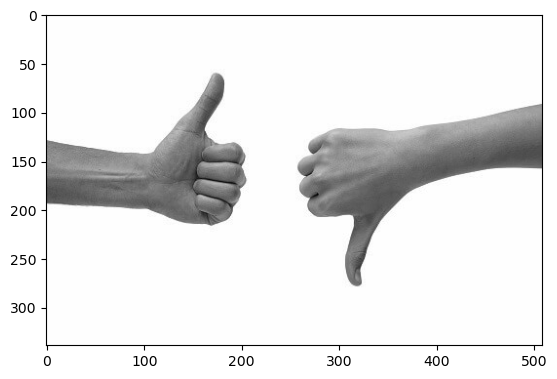

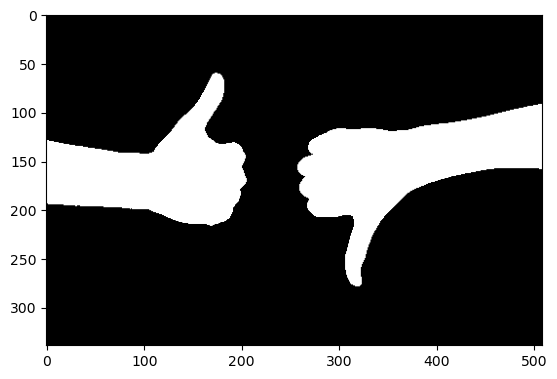

2


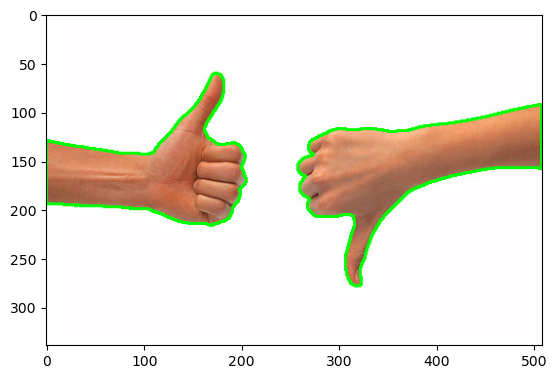

In [10]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the Image
image = cv2.imread("./thumbs_up_down.jpg")

# Step 2: BGR -> Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Create Binary Threshold Image:
_, binary = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)

plt.imshow(gray, cmap="gray")
plt.show()

plt.imshow(binary, cmap="gray")
plt.show()

# Step 4: Finding The Contours From The Thresholded Image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
test = cv2.drawContours(rgb, contours, -1, (0,255,0), 2)

plt.imshow(test)
plt.show()

2


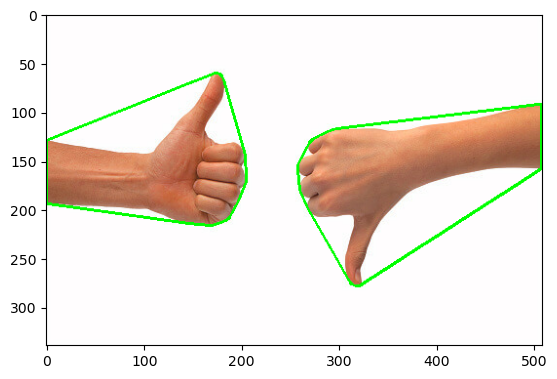

In [13]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the Image
image = cv2.imread("./thumbs_up_down.jpg")

# Step 2: BGR -> Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Create Binary Threshold Image:
_, binary = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)

#plt.imshow(gray, cmap="gray")
#plt.show()

#plt.imshow(binary, cmap="gray")
#plt.show()

# Step 4: Finding The Contours From The Thresholded Image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 5: Iterate Through The Contours
count = 0
for c in contours:
    hull = cv2.convexHull(c)
    count+=1
    cv2.drawContours(rgb, [hull], 0, (0,255,0), 2)

plt.imshow(rgb)
plt.show()

2
Area of Contour:  0 Is:  18114.0
Area of Contour:  1 Is:  15348.5


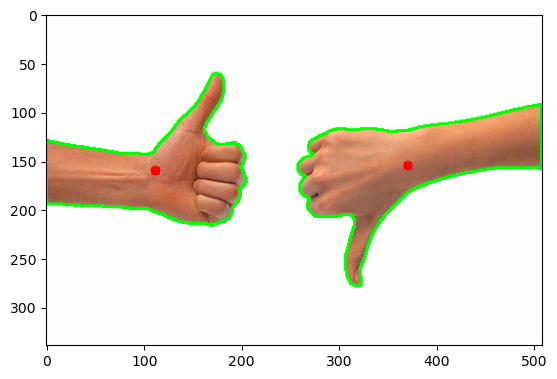

In [16]:
# Contour Features.. Centroid (Using Moments) and Area

import cv2
import matplotlib.pyplot as plt

# Step 1: Read the Image
image = cv2.imread("./thumbs_up_down.jpg")

# Step 2: BGR -> Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Create Binary Threshold Image:
_, binary = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)

#plt.imshow(gray, cmap="gray")
#plt.show()

#plt.imshow(binary, cmap="gray")
#plt.show()

# Step 4: Finding The Contours From The Thresholded Image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 5: Iterate Through The Contours
count = 0
for c in contours:
    # USED TO FIND CENTERS OF CIRCLE:
    M = cv2.moments(c)
    cX = int(M['m10']/M['m00'])
    cY = int(M['m01']/M['m00'])
    cv2.circle(rgb, (cX,cY), 5, (255,0,0), -1)
    # DRAWING CONTOURS
    cv2.drawContours(rgb, [c], 0, (0,255,0), 2)
    # OUTPUTTING AREA
    area = cv2.contourArea(c)
    print('Area of Contour: ', count, 'Is: ', area)
    count+=1


plt.imshow(rgb)
plt.show()